# Kernel Regression

Kernel Regression is a non-parametric approach to regression problems. The main idea behind Kernel Regression is to compute the regression function **locally** at each query point $ x_0 $.

## Formulation

Given a data point $ x_0 $, the estimated regression function $ \hat{f}(x_0) $ is defined as:

$ \hat{f}(x_0) = \frac{\sum_{i=1}^{n} K_\lambda(x_0, x_i) y_i}{\sum_{i=1}^{n} K_\lambda(x_0, x_i)} $

where:

- $ K_\lambda(x_0, x_i) $ is the **kernel function** that gives weights based on the distance between the query point $ x_0 $ and the data points $ x_i $.
- $ \lambda $ is often called the **bandwidth** or **window width**, controlling the width of the neighborhood around $ x_0 $ that influences the regression estimate.

We used the Gaussian kernel in our example:

$ K_\lambda(x_0, x_i) = \frac{1}{\sqrt{2\pi}\lambda} e^{-\frac{(x_0 - x_i)^2}{2\lambda^2}} $

## Bandwidth Selection

Choosing an optimal value for the bandwidth $ \lambda $ is crucial. Too small, and the model will capture noise (overfit). Too large, and the model might miss important structures (underfit).

One common method for selecting $ \lambda $ is **Leave-One-Out Cross-Validation (LOOCV)**. The idea is to compute the Kernel Regression estimate $ \hat{f}_{-i}(x_i) $ for each data point $ x_i $ using all data points except $ x_i $ and calculate the prediction error:

$ e_i = y_i - \hat{f}_{-i}(x_i) $

The Mean Squared Error (MSE) over all $ e_i $ values is then computed for each potential bandwidth. The bandwidth that minimizes this error is chosen as the optimal bandwidth.

<b>Reference:</b> From GaTech ISYE 8803 High Dimensional Data Analytics lecture notes, enhanced with ChatGPT.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Optimal bandwidth h: 0.035


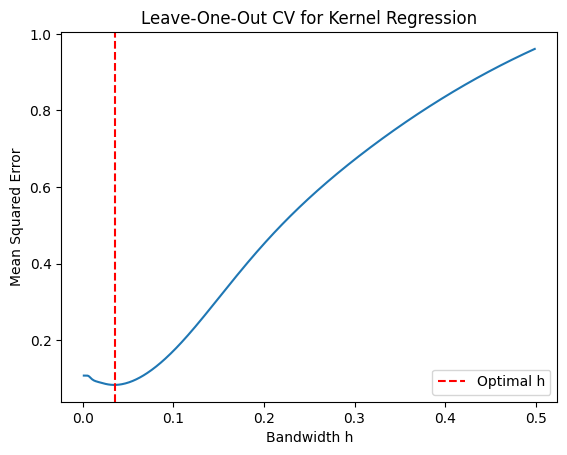

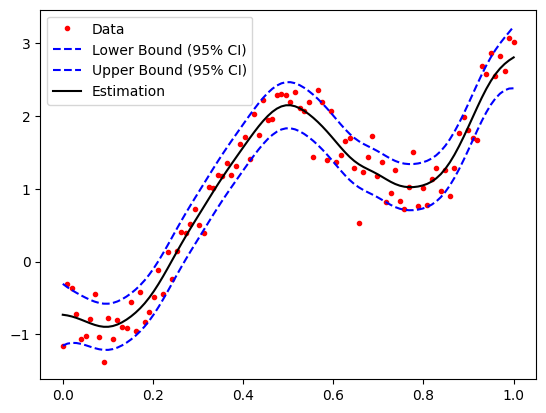

In [2]:
# Data generation
n = 100
D = np.linspace(0, 1, n)
sigma = 0.3
fun = lambda x: 2.5 * x - np.sin(10 * x) - np.exp(-10 * x)
y = fun(D) + np.random.randn(n) * sigma

# Gaussian kernel function
kerf = lambda z: np.exp(-z**2 / 2) / np.sqrt(2 * np.pi)

# Leave-one-out CV
h_values = np.arange(0.001, 0.5, 0.001)
mse = []

for h in h_values:
    errors = []
    for i in range(n):
        mask = np.ones(n, bool)
        mask[i] = 0
        X1, Y1 = D[mask], y[mask]
        
        z = kerf((D[i] - X1) / h)
        y_ke = np.sum(z * Y1) / np.sum(z)
        error = y[i] - y_ke
        errors.append(error)
    
    mse.append(np.mean(np.array(errors)**2))

# Optimal bandwidth
h_optimal = h_values[np.argmin(mse)]
print("Optimal bandwidth h:", h_optimal)

# Plotting
plt.plot(h_values, mse)
plt.axvline(x=h_optimal, color='red', linestyle='--', label='Optimal h')
plt.xlabel('Bandwidth h')
plt.ylabel('Mean Squared Error')
plt.title('Leave-One-Out CV for Kernel Regression')
plt.legend()
plt.show()

# Kernel regression estimate using optimal bandwidth
yhat_best = np.zeros(n)
for i in range(n):
    z = kerf((D - D[i]) / h_optimal)
    yhat_best[i] = np.sum(z * y) / np.sum(z)

# Calculate 95% confidence intervals
alpha = 0.05
z_val = np.abs(np.percentile(np.random.randn(10000), 100*(1-alpha/2)))  # z-value for 95% confidence
stderr = sigma / np.sqrt(np.sum(kerf((D - D[:, np.newaxis]) / h_optimal), axis=1))
yn = yhat_best - z_val * stderr
yp = yhat_best + z_val * stderr

# Plot function
plt.plot(D, y, 'r.', label='Data')
plt.plot(D, yn, 'b--', label='Lower Bound (95% CI)')
plt.plot(D, yp, 'b--', label='Upper Bound (95% CI)')
plt.plot(D, yhat_best, 'k-', label='Estimation')
plt.legend()
plt.show()